<a href="https://colab.research.google.com/github/yweslakarep123/ant_colony_iris/blob/main/code_ant_colony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

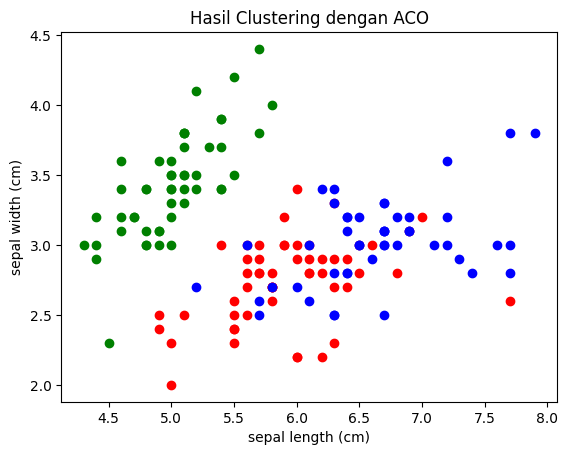

In [2]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Fungsi untuk menghitung jarak Euclidean antara dua titik
def jarak(titik1, titik2):
    return np.sqrt(np.sum((titik1 - titik2)**2))

# Fungsi fitness untuk menghitung total jarak dalam cluster
def total_jarak(clusters, data):
    total_distance = 0
    for cluster in clusters:
        if len(cluster) > 1:
            for i in range(len(cluster)):
                for j in range(i + 1, len(cluster)):
                    total_distance += jarak(data[cluster[i]], data[cluster[j]])
    return total_distance

# Fungsi ACO untuk clustering
def aco_clustering(data, n_clusters, n_ants, n_iterations, alpha, beta, evaporation_rate, Q):
    n_points = len(data)
    pheromone = np.ones((n_points, n_points))
    best_clusters = None
    best_distance = np.inf

    for iteration in range(n_iterations):
        all_clusters = []
        all_distances = []

        for ant in range(n_ants):
            clusters = [[] for _ in range(n_clusters)]
            points = np.random.permutation(n_points)

            for point in points:
                probabilities = np.zeros(n_clusters)
                for i in range(n_clusters):
                    if len(clusters[i]) > 0:
                        distances = [jarak(data[point], data[p]) for p in clusters[i]]
                        if np.mean(distances) > 0:
                            probabilities[i] = (np.sum(pheromone[point, clusters[i]])**alpha) / (np.mean(distances)**beta)
                        else:
                            probabilities[i] = 1.0
                    else:
                        probabilities[i] = 1.0

                if np.sum(probabilities) == 0:
                    probabilities = np.ones(n_clusters) / n_clusters
                else:
                    probabilities /= np.sum(probabilities)

                cluster_idx = np.random.choice(range(n_clusters), p=probabilities)
                clusters[cluster_idx].append(point)

            distance = total_jarak(clusters, data)
            all_clusters.append(clusters)
            all_distances.append(distance)

            if distance < best_distance:
                best_clusters = clusters
                best_distance = distance

        pheromone *= evaporation_rate

        for clusters, distance in zip(all_clusters, all_distances):
            for cluster in clusters:
                for i in range(len(cluster)):
                    for j in range(i + 1, len(cluster)):
                        pheromone[cluster[i], cluster[j]] += Q / distance
                        pheromone[cluster[j], cluster[i]] += Q / distance

    return best_clusters

# Memuat dataset iris
iris = load_iris()
data = iris.data

# Parameter ACO
n_clusters = 3
n_ants = 10
n_iterations = 100
alpha = 1
beta = 2
evaporation_rate = 0.5
Q = 1

# Menjalankan ACO untuk clustering
clusters = aco_clustering(data, n_clusters, n_ants, n_iterations, alpha, beta, evaporation_rate, Q)

# Visualisasi hasil clustering
colors = ['r', 'g', 'b']
for cluster_idx, cluster in enumerate(clusters):
    cluster_data = data[cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[cluster_idx])

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Hasil Clustering dengan ACO')
plt.show()
